# **ULTA SKINCARE REVIEWS ANALYSIS**

In [2]:
#packages needed
import sys

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import nltk
import numpy as np 
import pandas as pd

from nltk.tokenize import word_tokenize


#text normalization function
#text normalization function
%run ./Text_Normalization_Function.ipynb
#ignore warnings about future changes in functions as they take too much space
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\CCCCCo'i'n\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CCCCCo'i'n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CCCCCo'i'n\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\CCCCCo'i'n\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CCCCCo'i'n\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CCCCCo'i'n\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **READ AND SUMMARIZE ULTA SKINCARE REVIEWS**

In [4]:
df = pd.read_csv('Ulta Skincare Reviews.csv')

Summary of the data frame

In [5]:
df.fillna('Unknown' , inplace = True)
df.isnull().sum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4150 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4150 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [6]:
print(df.columns)
print(df.shape)
df.head()

Index(['Review_Title', 'Review_Text', 'Verified_Buyer', 'Review_Date',
       'Review_Location', 'Review_Upvotes', 'Review_Downvotes', 'Product',
       'Brand', 'Scrape_Date'],
      dtype='object')
(4150, 10)


,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [7]:
df['Review_Text'] = df['Review_Text'].fillna('').astype(str)
df['tokens'] = df['Review_Text'].apply(lambda x: word_tokenize(x))

In [8]:
print('\nTotal sentences in the reviews:', len(df['Review_Text']))


Total sentences in the reviews: 4150


In [9]:
print('\nFirst sentence in alice:', df['Review_Text'][0])


First sentence in alice: Love using this on my face while in the shower. Heats up and gives a light scrub nicely


## **DATA PRE-PROCESSING**

### **Text Tokenization**

In [10]:
df['tokens']

0       [Love, using, this, on, my, face, while, in, t...
1       [Even, better, than, the, daily, microfoliant,...
2       [Enjoy, this, product, so, much, !, I, look, f...
3       [I, 've, never, tried, anything, like, this, b...
4       [This, exfoliates, very, nicely, and, gives, a...
                              ...                        
4145           [Much, better, product, than, a, scrub, .]
4146    [I, 've, been, using, this, exfoliant, for, a,...
4147    [My, skin, looks, better, now, than, 10, years...
4148    [This, product, was, useless, for, me, ., I, s...
4149    [This, product, is, amazing, !, It, is, the, o...
Name: tokens, Length: 4150, dtype: object

### **Remove Stopwords, numbers, and punctuations**

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

stop_words = set(stopwords.words("english"))
print(stop_words)

{'are', 'more', 'aren', 'while', "wouldn't", 'again', "shan't", 'why', 'y', 'he', 'yours', 'her', 'needn', 'those', 'how', 'so', 'under', 'and', 'very', 'what', 'shan', 'she', 'hadn', 'myself', 'any', 'shouldn', 'all', 'below', 'should', 'that', 'did', 'been', 'don', 'these', 'with', 'theirs', 've', 'won', 't', 'only', 'here', 'by', "doesn't", 'were', 'before', "you're", "aren't", "weren't", 'you', 'do', 'because', "hasn't", 'after', 'out', 'has', 'ain', "won't", 'wouldn', 'no', 'between', 'this', 'is', 'doing', 'hasn', 'where', 'it', 'which', 'on', "isn't", 'a', 'an', 'o', "don't", 'its', 'will', 'most', "mightn't", 'now', 'during', "it's", 'doesn', 'about', 'mightn', 'be', 'other', 'm', "didn't", 'i', 'themselves', 'then', "needn't", 'who', 'but', "mustn't", 'weren', 'few', 'or', 'too', "you'd", 'himself', 'them', 'both', 'me', 'at', "you've", 'up', "couldn't", 'whom', 'our', 'had', 're', 'into', 'just', 'some', 'than', 'there', 'each', 'isn', 'off', 'through', 'ourselves', 'haven', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CCCCCo'i'n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def remove_stopwords_numbers_and_punctuation(tokens):
    
    stop_words=set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_tokens = [token.translate(str.maketrans('', '',string.punctuation)) for token in filtered_tokens]
    filtered_tokens = [token for token in filtered_tokens if token] # Remove empty strings
    
    return filtered_tokens

df['filtered_tokens'] = df['tokens'].apply(remove_stopwords_numbers_and_punctuation)

df['filtered_tokens']

0       [Love, using, face, shower, Heats, gives, ligh...
1       [Even, better, daily, microfoliant, m, obsesse...
2       [Enjoy, product, much, look, forward, using, r...
3       [ve, never, tried, anything, like, love, apply...
4       [exfoliates, nicely, gives, smooth, skin, irri...
                              ...                        
4145                       [Much, better, product, scrub]
4146    [ve, using, exfoliant, months, Depending, cond...
4147                [skin, looks, better, 10, years, ago]
4148    [product, useless, ve, known, exfoliant, use, ...
4149    [product, amazing, thing, helps, dry, patches,...
Name: filtered_tokens, Length: 4150, dtype: object

In [13]:
import re
def remove_numbers(tokens):
    return [re.sub(r'\d+', '', token) for token in tokens if not token.isdigit()]

df['filtered_tokens'] = df['filtered_tokens'].apply(remove_numbers)
df['filtered_tokens']

0       [Love, using, face, shower, Heats, gives, ligh...
1       [Even, better, daily, microfoliant, m, obsesse...
2       [Enjoy, product, much, look, forward, using, r...
3       [ve, never, tried, anything, like, love, apply...
4       [exfoliates, nicely, gives, smooth, skin, irri...
                              ...                        
4145                       [Much, better, product, scrub]
4146    [ve, using, exfoliant, months, Depending, cond...
4147                    [skin, looks, better, years, ago]
4148    [product, useless, ve, known, exfoliant, use, ...
4149    [product, amazing, thing, helps, dry, patches,...
Name: filtered_tokens, Length: 4150, dtype: object

### **Lemmatization**

In [14]:
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')



def lemmatize(filtered_tokens):
    lem = WordNetLemmatizer()
    lemmatized_tokens = [lem.lemmatize(token) for token in filtered_tokens]
    return lemmatized_tokens

df['lemmatized_tokens'] = df['filtered_tokens'].apply(lemmatize)

df['lemmatized_tokens']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CCCCCo'i'n\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\CCCCCo'i'n\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0       [Love, using, face, shower, Heats, give, light...
1       [Even, better, daily, microfoliant, m, obsesse...
2       [Enjoy, product, much, look, forward, using, r...
3       [ve, never, tried, anything, like, love, apply...
4       [exfoliates, nicely, give, smooth, skin, irrit...
                              ...                        
4145                       [Much, better, product, scrub]
4146    [ve, using, exfoliant, month, Depending, condi...
4147                      [skin, look, better, year, ago]
4148    [product, useless, ve, known, exfoliant, use, ...
4149    [product, amazing, thing, help, dry, patch, ch...
Name: lemmatized_tokens, Length: 4150, dtype: object

### **Text Vectorization(TF_IDF)**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer_TF_IDF = TfidfVectorizer(norm = None, smooth_idf = True)

In [16]:
df['lemmatized_tokens_str'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))
TF_IDF_matrix = vectorizer_TF_IDF.fit_transform(df['lemmatized_tokens_str']).toarray()
pd.DataFrame(np.round(TF_IDF_matrix, 2), columns=vectorizer_TF_IDF.get_feature_names_out())

,aa,ab,aback,ability,abit,able,abrasive,abrasiveness,absolute,absolutely,...,zero,zillion,zincbased,zit,zone,zoo,zzz,œdaily,œgo,œpick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4146,0.0,0.0,0.0,0.0,0.0,0.0,5.32,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4147,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4148,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalize the TF-IDF matrix: restrict all entries to be between 0 and 1.

In [17]:
vectorizer_TF_IDF = TfidfVectorizer(norm = 'l2', smooth_idf = True)
TF_IDF_matrix = vectorizer_TF_IDF.fit_transform(df['lemmatized_tokens_str']).todense()
pd.DataFrame(np.round(TF_IDF_matrix,2), columns=vectorizer_TF_IDF.get_feature_names_out())

,aa,ab,aback,ability,abit,able,abrasive,abrasiveness,absolute,absolutely,...,zero,zillion,zincbased,zit,zone,zoo,zzz,œdaily,œgo,œpick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4146,0.0,0.0,0.0,0.0,0.0,0.0,0.13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4147,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4148,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print(np.round(vectorizer_TF_IDF.idf_,2))

[8.64 8.64 8.64 ... 8.64 8.64 8.64]


word cloud

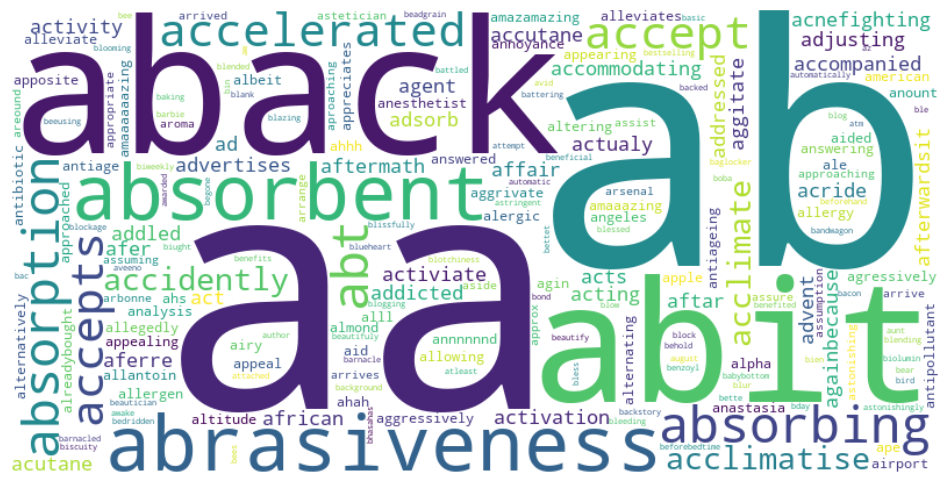

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

idf = vectorizer_TF_IDF.idf_
word_idf = dict(zip(vectorizer_TF_IDF.get_feature_names(), idf))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate_from_frequencies(word_idf)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **SENTIMENT ANALYSIS** <br>

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\CCCCCo'i'n\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [22]:
df['sentiment'] = df['lemmatized_tokens_str'].apply(lambda x: 'positive' if analyzer.polarity_scores(x)['compound'] > 0 else 'negative' if analyzer.polarity_scores(x)['compound'] < 0 else 'neutral')
df['lemmatized_tokens_str'].value_counts()

used finger rubbed mask clean damp skin Left min wet finger rubbed skin rinsed skin left feeling soft smooth looking great texture mask little sphere smell great would definitely recommend giving try    89
Works great skin type                                                                                                                                                                                      89
ve used product time nt noticed s exfoliating skin much notice s hydrating leaf face feeling fresh ll continue using mask especially since colder temperature face need extra moisture                     89
product wonderful mask keep least minute one take minute hurry one perfect Also make skin feel extremely soft afterwards small breakout using first time mean s getting impurity                           89
product leaf skin looking smooth hydrated also light scent cucumber bamboo s convenient time crunch take minute work magic received complimentary product                       

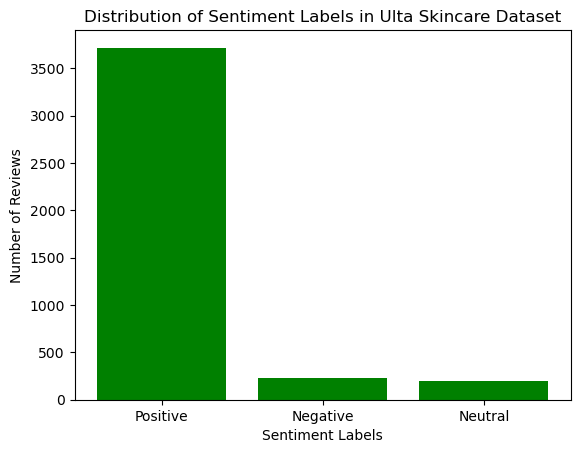

In [23]:
# Define the data
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_counts = [3719, 232, 199]

# Create a bar chart
plt.bar(sentiment_labels, sentiment_counts, color='green')

# Add labels and title
plt.xlabel('Sentiment Labels')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Labels in Ulta Skincare Dataset')

# Display the plot
plt.show()


In [24]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [25]:
reviews = np.array(df['lemmatized_tokens_str'])
titles = np.array(df['lemmatized_tokens_str'])
polarity = np.array(df['sentiment'])

reviews_test = reviews[0:2075]
reviews_train = reviews[2075:4150]

titles_test = titles[0:2075]
titles_train = titles[2075:4150]

polarity_test = polarity[0:2075]
polarity_train = polarity[2075:4150]

In [26]:
normalized_test_reviews = normalize_corpus(reviews_test)
normalized_train_reviews = normalize_corpus(reviews_train)

normalized_test_titles = normalize_corpus(titles_test)
normalized_train_titles = normalize_corpus(titles_train)

In [27]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [28]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in reviews_test]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()

,VADER Polarity,VADER Score
0,positive,0.7964
1,positive,0.2960
2,positive,0.8214
3,positive,0.8810
4,positive,0.1761


In [30]:
pd.crosstab(pd.Series(polarity_test), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,84,0,84
neutral,98,0,98
positive,9,1884,1893
All,191,1884,2075


In [32]:
true_precision = 1884/1884
print('Precision of the model is' , true_precision*100 , "%")
sensitivity_1 = 1884/1893
print('Sensitivity of the model is' , sensitivity_1)

Precision of the model is 100.0 %
Sensitivity of the model is 0.9952456418383518


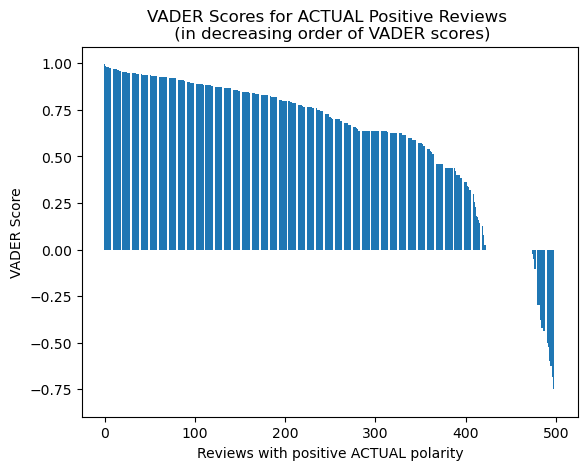

In [33]:
import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df[:500]['VADER Score']
plt.bar(range(0, 500), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()

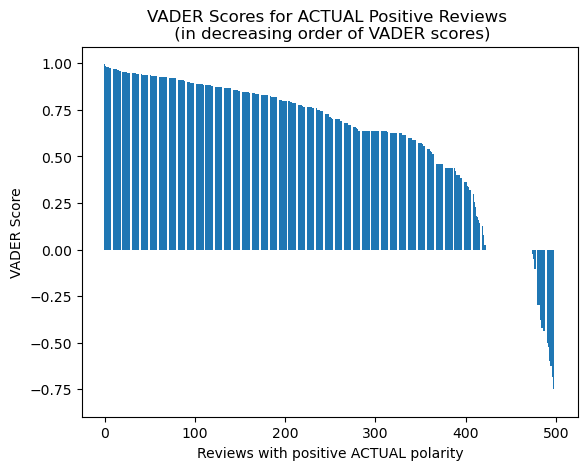

In [34]:
pos_reviews_scored = VADER_polarity_test_df[:500]['VADER Score']
plt.bar(range(0, 500), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,2)) 
feature_matrix_TRAIN = vectorizer.fit_transform(normalized_train_reviews).astype(float)

In [36]:
feature_matrix_TRAIN_names = vectorizer.get_feature_names_out() 
feature_matrix_TRAIN_table = pd.DataFrame(data = feature_matrix_TRAIN.todense(), 
                                          columns = feature_matrix_TRAIN_names)
feature_matrix_TRAIN_table.head()

,aa,aa brown,ab,ab result,aback,aback consistency,ability,ability determine,ability exfoliate,abit,...,zincbased sunscreen,zit,zit give,zone,zone oily,zone product,zone struggle,zone worst,zzz,zzz wonderful
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
feature_matrix_TEST = vectorizer.transform(normalized_test_reviews)

In [38]:
from sklearn import linear_model

svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
svm.fit(feature_matrix_TRAIN, polarity_train)
predicted_svm = svm.predict(feature_matrix_TEST) 

In [39]:
from sklearn import metrics
print('Accuracy rate:', np.round(metrics.accuracy_score(polarity_test, predicted_svm), 3))

Accuracy rate: 0.917


In [40]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression classifier
logreg = LogisticRegression(random_state=0)
logreg.fit(feature_matrix_TRAIN, polarity_train)

# Predict on the test set
predicted_logreg = logreg.predict(feature_matrix_TEST)

# Compute the accuracy rate for the classifier
print('Accuracy rate:', np.round(metrics.accuracy_score(polarity_test, predicted_logreg), 3))

Accuracy rate: 0.912


In [41]:
sample_ids = [0, 30, 330, 855, 951, 995] 

for doc_index in sample_ids:
    print('Review:-')
    print(df['lemmatized_tokens_str'][doc_index])
    print('\nActual Labeled Sentiment:', polarity_test[doc_index])
    print('Predicted Sentiment:', predicted_svm[doc_index])   
    print('-'*60)

Review:-
Love using face shower Heats give light scrub nicely

Actual Labeled Sentiment: positive
Predicted Sentiment: positive
------------------------------------------------------------
Review:-
love product make skin feel smooth

Actual Labeled Sentiment: positive
Predicted Sentiment: positive
------------------------------------------------------------
Review:-
love product make skin feel soft smooth People always comment lovely skin almost Thermafoliant use Power Recovery Masque recipe success

Actual Labeled Sentiment: positive
Predicted Sentiment: positive
------------------------------------------------------------
Review:-
Works great skin type

Actual Labeled Sentiment: positive
Predicted Sentiment: positive
------------------------------------------------------------
Review:-
product leaf skin looking smooth hydrated also light scent cucumber bamboo s convenient time crunch take minute work magic received complimentary product

Actual Labeled Sentiment: positive
Predicted S

## TOP MODELING  FOR POSITIVE AND NEGATIVE REVIEWS RESPECTIVELY  <br>

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
neutral_df = df[df['sentiment'] == 'neutral']

In [48]:
vectorizer_BOW = CountVectorizer(max_features=5000)

#### **Positive Review:**

In [62]:
Positive_BOW_matrix = vectorizer_BOW.fit_transform((positive_df['lemmatized_tokens_str'])).toarray()
pd.DataFrame(np.round(BOW_matrix,2))

,0,1,2,3,4,5,6,7,8,9,...,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4146,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
vectorizer_BOW.get_feature_names_out()
pd.DataFrame(np.round(Positive_BOW_matrix,2),columns=vectorizer_BOW.get_feature_names_out())

,aa,ab,aback,ability,abit,able,abrasive,abrasiveness,absolute,absolutely,...,zero,zillion,zincbased,zit,zone,zoo,zzz,œdaily,œgo,œpick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.decomposition import LatentDirichletAllocation

In [65]:
Positive_lda_review = LatentDirichletAllocation(n_components=4, max_iter=500,
                                           doc_topic_prior = 0.9,
                                           topic_word_prior = 0.9).fit(Positive_BOW_matrix)

Display results with top 50 words for each topic:

In [78]:
no_top_words = 50
display_topics(Positive_lda_review , vectorizer_BOW.get_feature_names_out(), no_top_words)

Topic 0:
skin use love feel product gentle like smooth face really exfoliant make daily soft dry nt dermalogica clean powder cleanser using sensitive look super makeup water well without enough every day amazing much recommend way scrub nice microfoliant get good easy exfoliate little harsh brighter go work exfoliator hand smoother
Topic 1:
great skin feeling face mask used left clean leaf smell soft fresh smooth recommend definitely moisture would exfoliating little finger rubbed product texture noticed ve need using nt looking try especially much extra time type notice continue hydrating wet since ll works giving damp rinsed min sphere colder temperature leaves
Topic 2:
product also time one minute skin take perfect keep work received small complimentary scent hydrated first soft afterwards smooth make looking using feel leaf getting wonderful light breakout extremely impurity mask magic least mean cucumber bamboo convenient hurry crunch dispenser keeps liquid forward level pollutant

Display **word vectors** (words are in alphabetical order) for each topic. Each column is a topic:

In [87]:
word_weights = Positive_lda_review.components_ / Positive_lda_review.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = vectorizer_BOW.get_feature_names_out(), 
                               columns = ["Topic_" + str(i) for i in range(4)])
word_weights_df.head(10)


,Topic_0,Topic_1,Topic_2,Topic_3
aa,0.000022,0.000055,0.000075,0.000048
ab,0.000027,0.000087,0.000082,0.000027
aback,0.000023,0.000054,0.000132,0.000028
ability,0.000087,0.000057,0.000082,0.000028
abit,0.000038,0.000072,0.000074,0.000024
able,0.000586,0.000086,0.000112,0.000549
abrasive,0.001263,0.000071,0.000090,0.000043
abrasiveness,0.000028,0.000054,0.000113,0.000030
absolute,0.000130,0.000075,0.000111,0.000281
absolutely,0.003201,0.000080,0.000095,0.000716


See the weights by 10 most frequent words in each topic 0:

In [84]:
words_by_topics = pd.DataFrame(columns = ["Topic_" + str(i) for i in range(0,4)])
words_by_topics["Topic_0"] = word_weights_df.sort_values(by='Topic_1',ascending=False).head(21).index.values
words_by_topics["Topic_1"] = word_weights_df.sort_values(by='Topic_1',ascending=False).head(21).index.values
words_by_topics["Topic_2"] = word_weights_df.sort_values(by='Topic_2',ascending=False).head(21).index.values
words_by_topics["Topic_3"] = word_weights_df.sort_values(by='Topic_3',ascending=False).head(21).index.values
words_by_topics

,Topic_0,Topic_1,Topic_2,Topic_3
0,great,great,product,product
1,skin,skin,also,skin
2,feeling,feeling,time,nt
3,face,face,one,using
4,mask,mask,minute,use
5,used,used,skin,used
6,left,left,take,week
7,clean,clean,perfect,ve
8,leaf,leaf,keep,would
9,smell,smell,work,day


In [95]:
lda_topic_weights = Positive_lda_review.transform(Positive_BOW_matrix)

In [96]:
doc_names = ["Doc_" + str(i) for i in range(len(positive_df['lemmatized_tokens_str']))]
topic_names = ["Topic_" + str(i) for i in range(4)]

df_document_topic = pd.DataFrame(np.round(lda_topic_weights, 4), columns=topic_names, index=doc_names)
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3
Doc_0,0.5877,0.1007,0.2138,0.0979
Doc_1,0.6805,0.0955,0.0805,0.1436
Doc_2,0.5585,0.2098,0.1121,0.1195
Doc_3,0.4141,0.0509,0.0482,0.4867
Doc_4,0.5595,0.0761,0.0715,0.2929


Show dominate topic for some document

In [97]:
#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3,dominant_topic
Doc_0,0.5877,0.1007,0.2138,0.0979,0
Doc_1,0.6805,0.0955,0.0805,0.1436,0
Doc_2,0.5585,0.2098,0.1121,0.1195,0
Doc_3,0.4141,0.0509,0.0482,0.4867,3
Doc_4,0.5595,0.0761,0.0715,0.2929,0


#### **Negative Reviews:**

In [115]:
negative_BOW_matrix = vectorizer_BOW.fit_transform((negative_df['lemmatized_tokens_str'])).toarray()
pd.DataFrame(np.round(BOW_matrix,2))

,0,1,2,3,4,5,6,7,8,9,...,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4146,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
vectorizer_BOW.get_feature_names_out()
pd.DataFrame(np.round(negative_BOW_matrix,2),columns=vectorizer_BOW.get_feature_names_out())

,able,abrasive,absolute,absolutely,absorbing,accident,accidentally,acid,acne,acneprone,...,woth,would,wrong,year,yes,yet,yo,younger,zero,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
negative_lda_review = LatentDirichletAllocation(n_components=4, max_iter=500,
                                           doc_topic_prior = 0.9,
                                           topic_word_prior = 0.9).fit(negative_BOW_matrix)

In [118]:
no_top_words = 50
display_topics(negative_lda_review , vectorizer_BOW.get_feature_names_out(), no_top_words)

Topic 0:
skin product use nt face using feel like used sensitive smooth dead ve get really week daily never would dry make exfoliant time bad day harsh every soft difference recommend smell first work without ca noticed love made breakout also routine feeling one pore horrible try leaf ever shower acne
Topic 1:
smell cleanser dermalogica nt work could disappointed never like thing way ll moisture enough brand exfoliating porta potty masque intensive alone bad may part cause sooo wash literally know nice fast head bottle irritation well made awful star stand care sticking oh fill either grainy instruction need afterwards hydro smells
Topic 2:
product skin one day disappointed would acne recommended ulta time back took burned bad well something still problem dermalogica next red finally especially got used price size clean almost eye worse told cleansing looking found pore work store year break many around breakout changed essential texture returning better turned stuck
Topic 3:
mask bot

In [119]:
word_weights = negative_lda_review.components_ / negative_lda_review.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = vectorizer_BOW.get_feature_names_out(), 
                               columns = ["Topic_" + str(i) for i in range(4)])
word_weights_df.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
able,0.000552,0.000676,0.000976,0.001301
abrasive,0.000975,0.000685,0.000498,0.000745
absolute,0.000486,0.000652,0.000477,0.000711
absolutely,0.000255,0.000693,0.001931,0.000746
absorbing,0.000474,0.000664,0.000483,0.000726
accident,0.000465,0.000665,0.000493,0.000734
accidentally,0.000279,0.000649,0.000483,0.001319
acid,0.000747,0.000654,0.000477,0.000713
acne,0.002934,0.000741,0.004820,0.000878
acneprone,0.000450,0.000697,0.000492,0.000748


In [120]:
words_by_topics = pd.DataFrame(columns = ["Topic_" + str(i) for i in range(0,4)])
words_by_topics["Topic_0"] = word_weights_df.sort_values(by='Topic_1',ascending=False).head(21).index.values
words_by_topics["Topic_1"] = word_weights_df.sort_values(by='Topic_1',ascending=False).head(21).index.values
words_by_topics["Topic_2"] = word_weights_df.sort_values(by='Topic_2',ascending=False).head(21).index.values
words_by_topics["Topic_3"] = word_weights_df.sort_values(by='Topic_3',ascending=False).head(21).index.values
words_by_topics

,Topic_0,Topic_1,Topic_2,Topic_3
0,smell,smell,product,mask
1,cleanser,cleanser,skin,bottle
2,dermalogica,dermalogica,one,irritating
3,nt,nt,day,water
4,work,work,disappointed,non
5,could,could,would,powder
6,disappointed,disappointed,acne,ok
7,never,never,recommended,exfoliant
8,like,like,ulta,give
9,thing,thing,time,much


In [121]:
lda_topic_weights = negative_lda_review.transform(negative_BOW_matrix)

In [122]:
#array of document "names" and topic "names" ("names" are just indecies)
doc_names = ["Doc_" + str(i) for i in range(len(negative_df['lemmatized_tokens_str']))]
topic_names = ["Topic_" + str(i) for i in range(4)]

In [123]:
#convert to dataframe
df_document_topic = pd.DataFrame(np.round(lda_topic_weights, 4), columns=topic_names, index=doc_names)
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3
Doc_0,0.7590,0.0811,0.0799,0.0800
Doc_1,0.2749,0.0845,0.1148,0.5258
Doc_2,0.1934,0.0729,0.6548,0.0789
Doc_3,0.2825,0.5773,0.0691,0.0711
Doc_4,0.5488,0.1199,0.1173,0.2140


In [124]:
#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

In [125]:
#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3,dominant_topic
Doc_0,0.7590,0.0811,0.0799,0.0800,0
Doc_1,0.2749,0.0845,0.1148,0.5258,3
Doc_2,0.1934,0.0729,0.6548,0.0789,2
Doc_3,0.2825,0.5773,0.0691,0.0711,1
Doc_4,0.5488,0.1199,0.1173,0.2140,0


### **Topic Model Evaluation for Positive and Negative Reviews**

In [98]:
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

#### **Positive Reviews:**

In [112]:
news_corpus_tokenized = positive_df['tokens']
news_dictionary = Dictionary(news_corpus_tokenized)
news_corpus_bow = [news_dictionary.doc2bow(doc) for doc in news_corpus_tokenized]
topic_topwords = get_topic_words(vectorizer = vectorizer_BOW, lda_model = Positive_lda_review, n_words=20)

Coherence score for the model overall:

In [113]:
cm = CoherenceModel(topics=topic_topwords, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4)) 

Coherence score for the model:  -3.076


Coherence score for the model overall

In [108]:
print("Coherence score by topic (higher values are better): ", np.round(cm.get_coherence_per_topic(),4))

Coherence score by topic (higher values are better):  [-1.9811 -3.7757 -2.5388 -4.0085]


Log-Likelihood Score:

In [109]:
print("Log-Likelihood (higher values are better): ", Positive_lda_review.score(Positive_BOW_matrix))

Log-Likelihood (higher values are better):  -591345.4677333207


Perplexity Score

In [111]:
print("Perplexity (lower values are better): ", Positive_lda_review.perplexity(Positive_BOW_matrix))

Perplexity (lower values are better):  657.6050926535604


#### **Negative Reviews:**

In [127]:
news_corpus_tokenized = negative_df['tokens']
news_dictionary = Dictionary(news_corpus_tokenized)
news_corpus_bow = [news_dictionary.doc2bow(doc) for doc in news_corpus_tokenized]
topic_topwords = get_topic_words(vectorizer = vectorizer_BOW, lda_model = negative_lda_review, n_words=20)

In [128]:
cm = CoherenceModel(topics=topic_topwords, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4)) 

Coherence score for the model:  -9.0395


In [132]:
print("Coherence score by topic (higher values are better): ", np.round(cm.get_coherence_per_topic(),4))

Coherence score by topic (higher values are better):  [ -2.0022 -11.78    -8.0192 -14.3567]


In [133]:
print("Log-Likelihood (higher values are better): ", negative_lda_review.score(negative_BOW_matrix))

Log-Likelihood (higher values are better):  -28777.744253843557


In [135]:
print("Perplexity (lower values are better): ", negative_lda_review.perplexity(negative_BOW_matrix))

Perplexity (lower values are better):  768.6192812337752
